In [10]:
import numpy as np; np.random.seed(0)
import matplotlib.pyplot as plt
from time_series_utils import estimate_parameters, log_loss, sigmoid, binary_sigmoid, MSE, identity, binary_linear
import time
from scipy.sparse import rand

In [11]:
activation_binary = binary_sigmoid
activation = sigmoid
loss = log_loss

In [12]:
# Creating random events with some density over an n by m grid.
L_rows, L_columns = 15,16
L = L_rows * L_columns
# Time horizon of lenght N and process memory N.
d = 3
periods = 4
N = d + d*periods
# Initialiazing the time horizon.
time_horizon = np.zeros(shape=(N,L))
# Create a random Bernoulli process grid at the initial time strech.
for s in range(d):
    x = rand(L_rows, L_columns, density=0.2, format='csr')
    x.data[:] = 1
    x = x.toarray().flatten()
    for l in range(L):
        time_horizon[s] = x

In [13]:
# Initialising the true parameter vector and the bias.
true_theta = np.random.randn(L, d*L)
# Generate time series.
for s in range(d,N):
    # Predictor X of dimension d*L.
    X = time_horizon[(s-d):s].flatten()
    for l in range(L):
        time_horizon[s,l] = activation_binary(np.dot(X, true_theta[l]))


In [14]:
time_horizon

array([[0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 1., 0.],
       [1., 0., 1., 1., 1., 0.],
       [1., 1., 0., 1., 1., 0.]])

Iterations: 1000 , time: 11.16106629371643 .


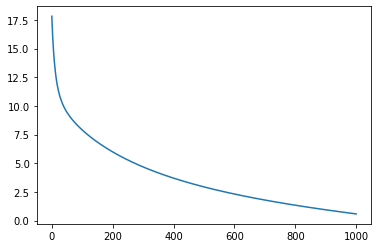

In [5]:
# Gradient Descent.
start_time = time.time()
theta, i, log_err = estimate_parameters(time_horizon, N, L, d, max_iterations=1000, activation=activation, loss=loss)
print("Iterations:", i, ", time:", (time.time() - start_time), ".")
plt.plot(log_err, label="Log loss function")

In [6]:
X_test = time_horizon[(N-d):N].flatten()
y = np.ones(L)
for l in range(L):
    y[l] = activation_binary(np.dot(X_test, true_theta[l]))
prediction = np.ones(L)
for l in range(L):
    prediction[l] = activation(np.dot(X_test, theta[l]))

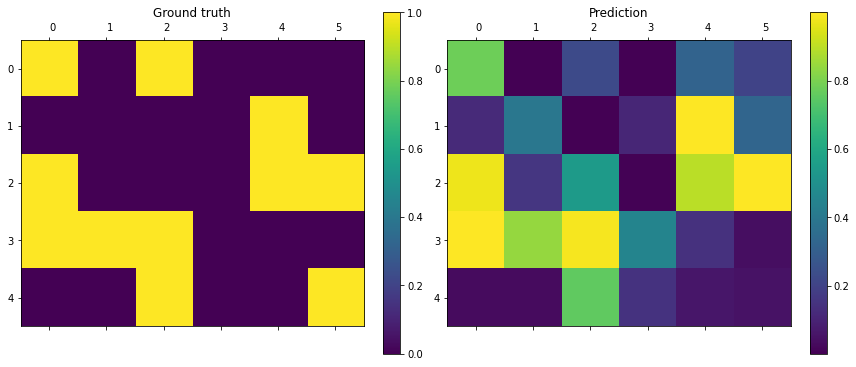

In [7]:
# Basic configuration.
fig, axes = plt.subplots(ncols=2, figsize=(12, 12))
ax1, ax2 = axes
im1 = ax1.matshow(y.reshape((L_rows, L_columns)))
im2 = ax2.matshow(prediction.reshape((L_rows, L_columns)))

# Formatting for heat map 1.
ax1.set_xticks(range(L_columns))
ax1.set_yticks(range(L_rows))
ax1.set_title("Ground truth")
plt.setp(ax1.get_xticklabels(), ha='left')
plt.colorbar(im1, fraction=0.045, pad=0.05, ax=ax1)

# Formatting for heat map 2.
ax2.set_xticks(range(L_columns))
ax2.set_yticks(range(L_rows))
ax2.set_title("Prediction")
plt.setp(ax2.get_xticklabels(), ha='left')
plt.colorbar(im2, fraction=0.045, pad=0.05, ax=ax2)

fig.tight_layout()